In [1]:
pip install wfdb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 3.0 MB/s eta 0:00:00


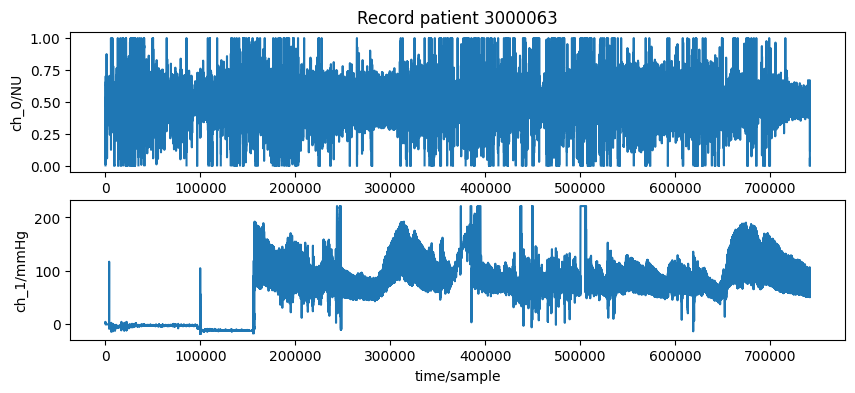

Printing Signals


array([[ 0.5254902 ,         nan],
       [ 0.52941176,         nan],
       [ 0.52941176,         nan],
       ...,
       [ 0.54901961, 59.06231543],
       [ 0.55686275, 62.81230371],
       [ 0.56862745, 68.43728613]])

Printing fields


{'fs': 125,
 'sig_len': 742015,
 'n_sig': 2,
 'base_date': None,
 'base_time': datetime.time(21, 17, 59),
 'units': ['NU', 'mmHg'],
 'sig_name': ['PLETH', 'ABP'],
 'comments': []}

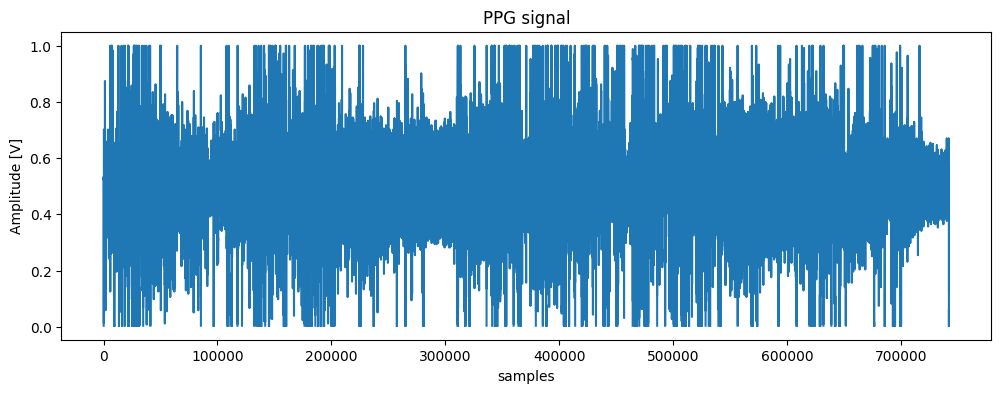

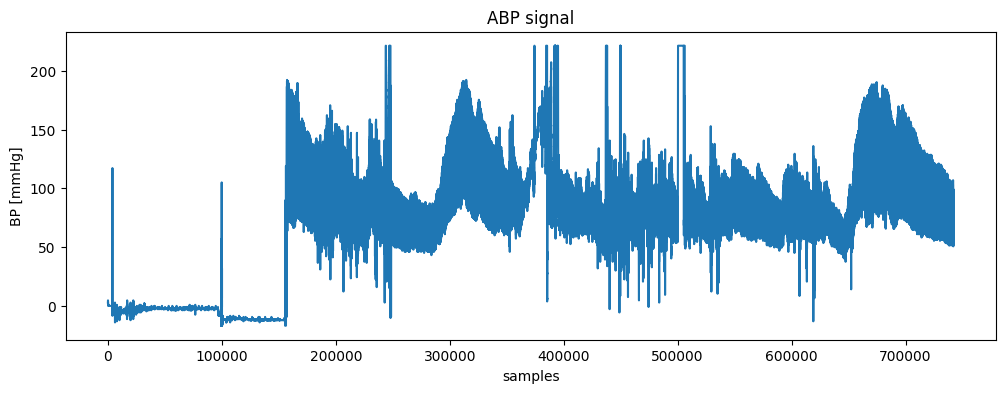

In [2]:
#import libraries
import io
import os
import pandas as pd
import numpy as np
import wfdb
from IPython.display import display
import matplotlib.pyplot as plt


#analyzing model by extracting a single patient record
signals, fields = wfdb.rdsamp('mimic3wdb/30/3000063/3000063_0006',
                              pn_dir='mimic3wdb/30/3000063',
                                     channel_names = ["PLETH", "ABP"]) #, sampfrom=0, sampto=7500)

wfdb.plot_items(signal=signals, fs=fields['fs'], time_units='samples',
                sig_units=['NU', 'mmHg'], figsize=(10,4), title= "Record patient 3000063")

print("Printing Signals")
display(signals)
print("Printing fields")
display(fields)
df_temp = pd.DataFrame(signals, columns=["PLETH", "ABP"])

#analyzing PPG and ABP signals
plt.figure(figsize=(12,4))
plt.xlabel("samples")
plt.ylabel("Amplitude [V]")
#plt.ylim(0, 4)
plt.title("PPG signal")
plt.plot(df_temp['PLETH'])
plt.show()

plt.figure(figsize=(12,4))
plt.xlabel("samples")
plt.ylabel("BP [mmHg]")
#plt.ylim(40, 140)
plt.title("ABP signal")
plt.plot(df_temp['ABP'])
plt.show()